In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy
import math
import cmath

In [2]:
L=10  # Domain
N=100 # Steps
y=np.linspace(-L,L,N)

In [3]:
# Preamble set up
beta = 2.2*(10**-11) # \beta
g = 0.0334 # Reduced gravity
H0 = 60 # Average thermocline depth (see Tanaka+Hibiya)
c=np.sqrt(g*H0) 
C=np.sqrt((2*beta/c))
#y=C*y
#y = C*x # Nondimensional
f = (beta)*y # beta plane
A0=-1.0 # Constant
A2=-1.0 # Constant
B=(y**2)/4.0 # Term inside the exponential

In [30]:
# Case: n=0
A0 = -1.0
H = A0*np.exp(-B)
dHdy = -(A0/2.0)*C*y*np.exp(-B)
#U = (g*A0/c)*np.exp(-B) 
U = -( g / f ) * dHdy #(why aren't these the same ?)
dUdy = U*0.5*y*np.sqrt(C)
HQ =beta*(1/C)*y + (g*A2 / 2*c)*C*y*np.exp(-B) 
#HQ = f - dUdy (again, why aren't these the same)

In [31]:
# Case: n=2
A2 = -1.0
H = A2*((y**2)-1)*np.exp(-B)
dHdy = -(A2/2.0)*C*y*((y**2)-5)*np.exp(-B)
U = -(g*A2/c)*((y**2)-5)*np.exp(-B) # Should there be a minus sign here ? 
HQ = beta*(1/C)*y + (g*A2/(2*c))*C*y*np.exp(-B)*((y**2)+9) 
#HQ = f - dUdy

In [32]:
# Case: Cubic

H = (y**3)*np.exp(-B)
dHdy = 3*(y**2)*C*np.exp(-B)-0.5*C*(y**4)*np.exp(-B)
U = (g/c)*y*np.exp(-B)*((y**2)-6)
HQ = beta*(1/C)*y - (g/c)*(-0.5*C*((y**2)-2)*((y**2)-6)*np.exp(-B)+2*C*(y**2)*np.exp(-B))

In [33]:
# Case: Quintic

H = (y**5)*np.exp(-B)
dHdy = -0.5*C*(y**4)*np.exp(-B)*((y**2)-10)
U = (g/c)*(y**3)*np.exp(-B)*((y**2)-10)
HQ = beta*(1/C)*y - (g/c)*(-(1/2)*C*((y**2))*((y**2)-6)*((y**2)-10)*np.exp(-B)+2*C*(y**4)*np.exp(-B))

In [4]:
# n=0 [0] # n=2 [1] # Cubic [2] # Quintic [3] # Sinusoidal [4]
i=0
m=2
A0=A1=A2=A3=A4=-1.0
A     = [A0,A1,A2,A3,A4]

#--------n=0-------------------------------------------#-n=2----------------------------------------------------------------------------------#-Cubic-------------------------------------------------------------------------------------------------------#-Quintic---------------------------------------------------------------------------------------------------------------------#-Sinusoidal---------------------------------------------------------------------------------
H     = [A0*np.exp(-B)                                 , A2*((y**2)-1)*np.exp(-B)                                                             , (y**3)*np.exp(-B)                                                                                           , (y**5)*np.exp(-B)                                                                                                           ,-(A[m]*beta/g)*((L/m*np.pi)**2)*((np.sin(m*np.pi*y/L)-(m*np.pi/L)*y*np.cos(m*np.pi/L)))    ]
dHdy  = [-(A0/2.0)*C*y*np.exp(-B)                      ,-(A2/2.0)*C*y*((y**2)-5)*np.exp(-B)                                                   , 3*(y**2)*C*np.exp(-B)-0.5*C*(y**4)*np.exp(-B)                                                               ,-0.5*C*(y**4)*np.exp(-B)*((y**2)-10)                                                                                         ,-(beta/(g*C))*y*A[m]*np.sin(m*np.pi*y/L)                                                   ]
U     = [(g*A0/c)*np.exp(-B)                           ,-(g*A2/c)*((y**2)-5)*np.exp(-B)                                                       , (g/c)*y*np.exp(-B)*((y**2)-6)                                                                               , (g/c)*(y**3)*np.exp(-B)*((y**2)-10)                                                                                         , A[m]*np.sin(m*np.pi*y / L)                                                                ]
dUdy  = [-(g*A0/2*c)*C*y*np.exp(-B)                    ,-(g*A2/(2*c))*C*y*np.exp(-B)*((y**2)+9)                                               , (g/c)*(-0.5*C*((y**2)-2)*((y**2)-6)*np.exp(-B)+2*C*(y**2)*np.exp(-B))                                       , (g/c)*(-(1/2)*C*((y**2))*((y**2)-6)*((y**2)-10)*np.exp(-B)+2*C*(y**4)*np.exp(-B))                                           , A[m]*(m*np.pi/L)*np.cos(m*np.pi*y/L)                                                      ]
HQ    = [beta*(1/C)*y + (g*A2 / 2*c)*C*y*np.exp(-B)    , beta*(1/C)*y + (g*A2/(2*c))*C*y*np.exp(-B)*((y**2)+9)                                , beta*(1/C)*y - (g/c)*(-0.5*C*((y**2)-2)*((y**2)-6)*np.exp(-B)+2*C*(y**2)*np.exp(-B))                        , beta*(1/C)*y - (g/c)*(-(1/2)*C*((y**2))*((y**2)-6)*((y**2)-10)*np.exp(-B)+2*C*(y**4)*np.exp(-B))                            , beta*y/C - A[m]*(m*np.pi/L)*np.cos(m*np.pi*y/L)                                           ]
dHQdy = [beta - (g*A0/4*c)*(C**3)*((y**2)-2)*np.exp(-B), beta + (g*A2/2*c)*C*(2*C*(y**2)*np.exp(-B)+((y**2)+9)*(-0.5*C*((y**2)-2)*np.exp(-B))), beta - (g/c)*C*((-0.5*C*y*np.exp(-B))*(-0.5*(y**2 -2)*(y**2 -6)+2*(y**2)) + np.exp(-B)*(-2*C*(y**3)+12*y*C)), beta - (g/c)*C*(-0.5*C*y*np.exp(-B)*(-0.5*(y**2)*((y**2) -6)*((y**2) -10)+2*(y**4))+np.exp(-B)*(6*C*(y**5)-56*C*(y**3)+120*C*y)), beta + A[m]*((m*np.pi/L)**2)*np.sin(m*np.pi*y/L)                                          ]



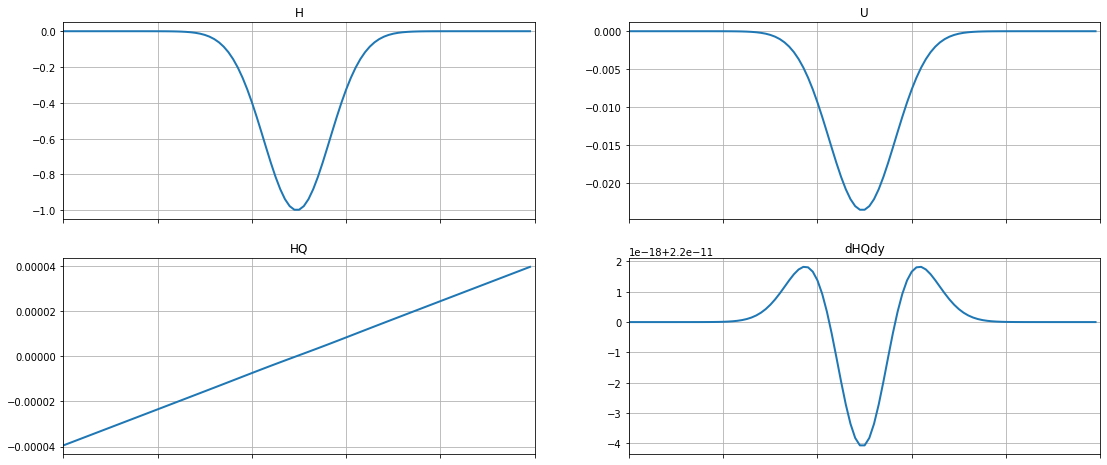

In [5]:
plt.figure(figsize=(12,4))

ax1 = plt.subplot(221)
ax1.plot(H[i],linewidth=2)
ax1.set_xlim([0,N])
ax1.set_title('H')
ax1.grid()
ax1.xaxis.set_ticklabels([])


ax2 = plt.subplot(222)
ax2.plot(U[i],linewidth=2)
ax2.set_xlim([0,N])
ax2.set_title('U')
ax2.grid()
ax2.xaxis.set_ticklabels([])

ax3 = plt.subplot(223)
ax3.plot(HQ[i],linewidth=2)
ax3.set_xlim([0,N])
ax3.set_title('HQ')
ax3.grid()
ax3.xaxis.set_ticklabels([])

ax4 = plt.subplot(224)
ax4.plot(dHQdy[i],linewidth=2)
ax4.set_xlim([0,N])
ax4.set_title('dHQdy')
ax4.grid()
ax4.xaxis.set_ticklabels([])

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 22

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE) 

plt.subplots_adjust(bottom=-0.5, right=1.2, left = 0, top=1)

plt.show()